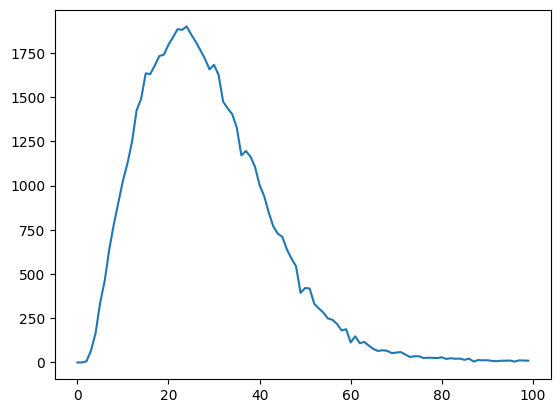

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from bpe import BPETokenizer, pad_to_length


file_path = "datasets/1b_benchmark.train.tokens"
tokenizer = BPETokenizer()
with open(file_path) as f:
    lines = [line.strip() for line in f if line.strip()]
    
tokenized = [tokenizer(line)[0] for line in lines]  # [0] removes batch dim

token_len = [len(sen) for sen in tokenized]
plt.plot(np.bincount(token_len)[:100])

4dim


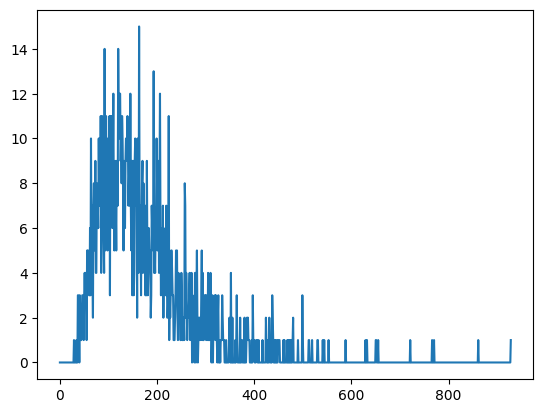

news


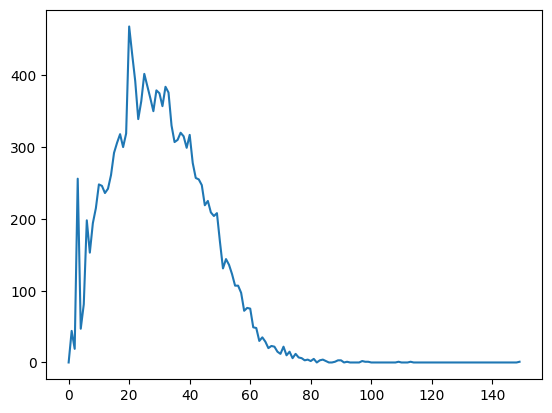

products


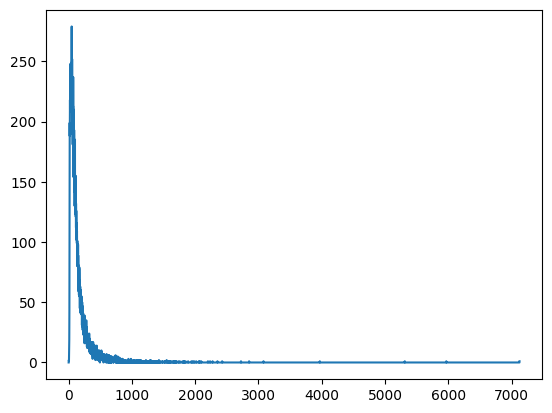

questions


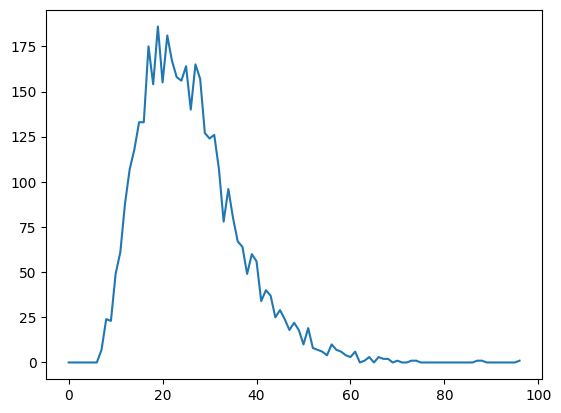

In [21]:
datasets = ["4dim", "news", "products", "questions"]
dataset = "4dim"
for dataset in datasets:
    file_path = f"datasets/{dataset}.train.txt"
    tokenizer = BPETokenizer()
    with open(file_path) as f:
        lines = [line.strip() for line in f if line.strip()]

    for i, line in enumerate(lines):
        if '\t' not in line:
            print(i)
    labels = [line.split('\t')[1] for line in lines]
    unique_labels = sorted(set(labels))  # sort for consistency
    label2id = {label: idx for idx, label in enumerate(unique_labels)}

    tokenized = [tokenizer(line.split('\t')[0])[0] for line in lines]  #check this in the final file
    token_len = [len(sen) for sen in tokenized]
    print(dataset)
    plt.plot(np.bincount(token_len))
    plt.show()

In [19]:
tokenized

[tensor([[ 2215,   345,  3802,   262, 10866,   379,   262, 26139,  6102, 15799,
             65, 12721, 12696,   345,  3393,   766,   326,   428,   318,   257,
           2041,  1295,   810,   345,   389,  1016,   284,   307,   279,   321,
          13653,    13,   383,  3085,   389,   845,  8030,   290,  7613,   290,
           1283, 17170,  3772,   284,  3342,   345,   287,   597,   835,   484,
            460,    13,   383,  2198,   287,  1429,   318,  7209,   290,  8030,
            355,   314,  2938,    13,  1649,   345,  3802,   534,  2119,   262,
          11705, 17591,   534,  4151,    13, 17145, 16421,  1865,   407,  3404,
             88,   318,   703,   314,  6901,   340,    13,   383, 40018, 12202,
            318,  1588,   290,   925,   286, 30623,    13,   383,  2187,  2119,
            318, 14854, 13839,   290,   925,   284,   787,   345,  1254,  2041,
           1865,   379,  1363,    13,   314,  4047,  4313,   383, 26139,  6102,
          15799,    65, 12721, 12696,   

In [ ]:
datasets = ["4dim", "news", "products", "questions"]

for dataset in datasets:
    print(f"CUDA_VISIBLE_DEVICES=1 python train.py -t finetune -i datasets/{dataset}.train.txt -p best.pretrain.model -o best.{dataset}.model -epoch 20")

In [28]:
params = ["32", "64", "128"]

for param in params:
    print(f"CUDA_VISIBLE_DEVICES=2 python train.py -epoch 10 -batch-size {param}")

CUDA_VISIBLE_DEVICES=2 python train.py -epoch 10 -batch-size 32
CUDA_VISIBLE_DEVICES=2 python train.py -epoch 10 -batch-size 64
CUDA_VISIBLE_DEVICES=2 python train.py -epoch 10 -batch-size 128


In [10]:
params = ["50", "200"]

for param in params:
    print(f"CUDA_VISIBLE_DEVICES=3 python train.py -epoch 10 -batch-size 128 -max-len {param}")

CUDA_VISIBLE_DEVICES=3 python train.py -epoch 10 -batch-size 128 -max-len 50
CUDA_VISIBLE_DEVICES=3 python train.py -epoch 10 -batch-size 128 -max-len 200


In [13]:
epochs = ["5", "10"]
batch_sizes = ["128"]
lrs = [float("5e-4")]
max_lens = [50, 200]
for epoch in epochs:
    for batch_size in batch_sizes:
        for lr in lrs:
            for max_len in max_lens:
                print(f"CUDA_VISIBLE_DEVICES=3 python evaluate.py -m ./models/{max_len}.{batch_size}.{lr}.{epoch}.model")


CUDA_VISIBLE_DEVICES=3 python evaluate.py -m ./models/50.128.0.0005.5.model
CUDA_VISIBLE_DEVICES=3 python evaluate.py -m ./models/200.128.0.0005.5.model
CUDA_VISIBLE_DEVICES=3 python evaluate.py -m ./models/50.128.0.0005.10.model
CUDA_VISIBLE_DEVICES=3 python evaluate.py -m ./models/200.128.0.0005.10.model


In [ ]:
CUDA_VISIBLE_DEVICES=3 python train.py -epoch 10 -batch-size 128 -max-len 200 -o best.lm.model
CUDA_VISIBLE_DEVICES=3 python evaluate.py -m best.lm.model